# Assignment 4

In [247]:
import numpy as np
import sympy as sp
from qutip import *
import matplotlib.pyplot as plt
sp.init_printing()

## Problem 1(a)

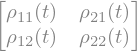

In [248]:
# Set up the density matrix
t = sp.Symbol('t', real=True)
rho = sp.Matrix([[sp.Function('rho_' + i + j)(t) for i in ['1', '2']] for j in ['1', '2']])
# rho[1,1] = 1 - rho[0,0]
rho

In [249]:
# Define the lowering operator
sm = sp.Matrix([[0, 0], [1, 0]])

commutator = lambda A, B: A*B - B*A
antiCommutator = lambda A, B: A*B + B*A

In [250]:
Omega = 0  #sp.symbols('Omega')
Gamma = sp.symbols('Gamma')
omega = sp.symbols('omega')

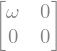

In [251]:
# Define the Hamiltonian
H = omega * sm.H * sm + Omega * (sm.H + sm) 
H

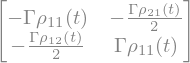

In [252]:
# Define the Lindblad operator
L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))
L

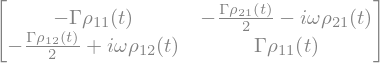

In [253]:
rhs = -sp.I * commutator(H, rho) + L
rhs

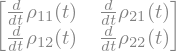

In [254]:
lhs = rho.applyfunc(lambda x: sp.diff(x, t))
lhs

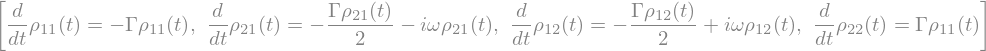

In [255]:
eqnlist = [sp.Eq(lhs[i,j], rhs[i,j]) for i in range(2) for j in range(2)]
eqnlist

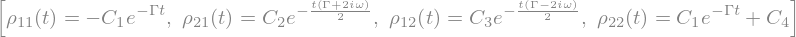

In [256]:
solution = sp.dsolve(eqnlist)
solution

## Problem 1(b)

In [257]:
ics = {rho[0,0].subs(t, 0): 1, rho[1,1].subs(t, 0): 0, rho[0,1].subs(t, 0): 0, rho[1,0].subs(t, 0): 0}
solution = sp.dsolve(eqnlist, ics=ics)
solution

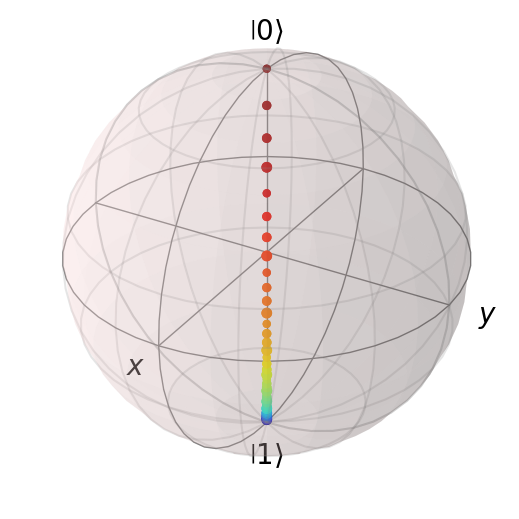

In [258]:
# lambdify the solution
rho11 = sp.lambdify([t, Gamma], solution[0].rhs, 'numpy')
rho22 = sp.lambdify([t, Gamma], solution[3].rhs, 'numpy')

def get_dm(t, Gamma=1):
    # In units of Gamma
    return Qobj(np.array([[rho11(t, Gamma), 0], [0, rho22(t, Gamma)]]))

# Plot the solution on the Bloch sphere
b = Bloch()
N = 50
b = Bloch()
for i,R in enumerate(np.linspace(0, 5, N)):
    b.add_states(get_dm(R), 'point')
    b.point_color = plt.cm.jet(np.linspace(1, 0, N))
    b.point_marker = ['o']
b.show()

## Problem 1(d)

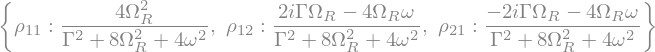

In [259]:
# Define the density matrix
rho = sp.Matrix([[sp.symbols('rho_' + i + j) for i in ['1', '2']] for j in ['1', '2']])
rho[1,1] = 1 - rho[0,0]

# Define the Hamiltonian
OmegaR = sp.symbols('Omega_R')
H0 = omega * sm.H * sm + Omega * (sm.H + sm) 
HL = OmegaR * (sm + sm.H)
H = H0 + HL

# Define the Lindblad operator
L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))

# Steady-state
rhs = -sp.I * commutator(H, rho) + L
eqnlist = [sp.Eq(0, rhs[i,j]) for i in range(2) for j in range(2)]
solution = sp.solve(eqnlist, [rho[0,0], rho[0,1], rho[1,0]])
solution

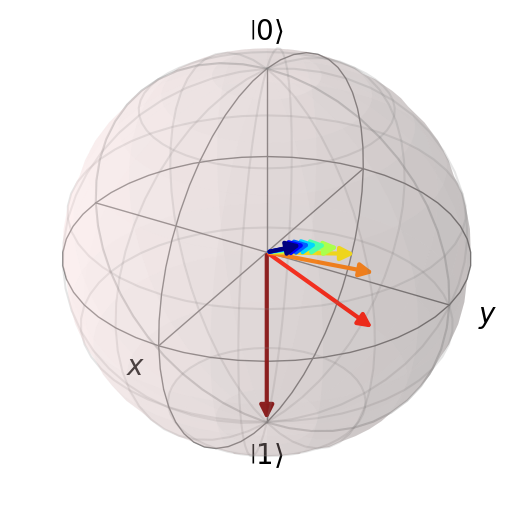

In [260]:
# lambdify the solution
rho11 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[0]], 'numpy')
rho12 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[1]], 'numpy')
rho21 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[2]], 'numpy')
rho22 = lambda omega, OmegaR, Gamma: 1 - rho11(omega, OmegaR, Gamma)


def get_dm(omega, OmegaR, Gamma=1):
    # In units of Gamma
    return Qobj([[rho11(omega, OmegaR, Gamma), rho12(omega, OmegaR, Gamma)], [rho21(omega, OmegaR, Gamma), rho22(omega, OmegaR, Gamma)]])

# Plot the solution on the Bloch sphere
N = 10
b = Bloch()
for i,R in enumerate(np.linspace(0, 5, N)):
    b.add_states(get_dm(1, R))
    b.vector_color = plt.cm.jet(np.linspace(1, 0, N))
b.show()

## Problem 3(a)

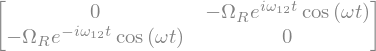

In [261]:
omega12 = sp.symbols('omega_12')
H = -OmegaR * sp.cos(omega * t) * (sp.exp(-sp.I * omega12 * t) * sm + sp.exp(sp.I * omega12 * t) * sm.H)
H

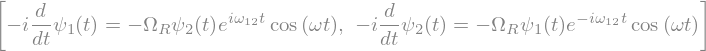

In [262]:
# Write out the Schrodinger equation
psi = sp.Matrix([sp.Function('psi_' + i)(t) for i in ['1', '2']])

rhs = H * psi
lhs = -sp.I * sp.diff(psi, t)

eqnlist = [sp.Eq(lhs[i], rhs[i]) for i in range(2)]
eqnlist

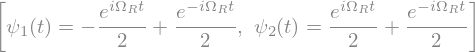

In [263]:
# Analytical solution
omega12 = sp.symbols('omega_12')
H = -OmegaR * (sm + sm.H)

# Write out the Schrodinger equation
psi = sp.Matrix([sp.Function('psi_' + i)(t) for i in ['1', '2']])

rhs = H * psi
lhs = -sp.I * sp.diff(psi, t)

eqnlist = [sp.Eq(lhs[i], rhs[i]) for i in range(2)]
eqnlist

# initial conditions in state 1
ics = {psi[0].subs(t, 0): 0, psi[1].subs(t, 0): 1}
solution = sp.dsolve(eqnlist, [psi[0], psi[1]], ics=ics)
solution

In [244]:
# lambdify the solution
psi1_rwa = sp.lambdify([t, OmegaR], solution[0].rhs, 'numpy')
psi2_rwa = sp.lambdify([t, OmegaR], solution[1].rhs, 'numpy')

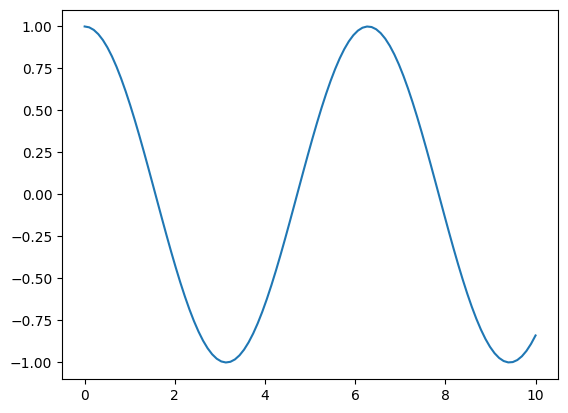

In [264]:
# plot the solution
t = np.linspace(0, 10, 100)
plt.plot(t, psi1_rwa(t, 1), label=r'$\psi_1$')

## Problem 3(b)

In [211]:
# Define symbols
omega_R = 1.0 
omega = 21.
omega12 = 20.

# Define the time-dependent parts of the Hamiltonian as functions
def H1_coeff(t, args):
    return -omega_R * np.cos(omega * t) * np.exp(1j * omega12 * t)

def H2_coeff(t, args):
    return -omega_R * np.cos(omega * t) * np.exp(-1j * omega12 * t)

# Operators
H1 = Qobj([[0, 1], [0, 0]])
H2 = Qobj([[0, 0], [1, 0]])

# Combine into a time-dependent Hamiltonian
H = [[H1, H1_coeff], [H2, H2_coeff]]

# Initial state (ground state)
psi0 = Qobj([[1], [0]])

# Time range
tlist = np.linspace(0, 10, 500)

result = sesolve(H, psi0, tlist)


In [ ]:
# Approximate solution


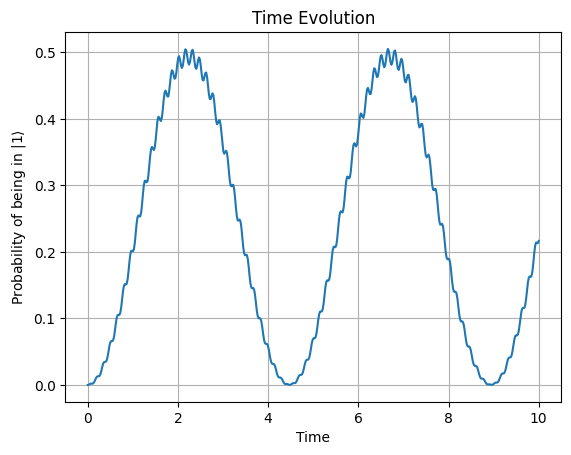

In [212]:
excited_state = Qobj([[0], [1]])
probabilities = np.array([abs(state.overlap(excited_state))**2 for state in result.states])

plt.plot(tlist, probabilities)
plt.xlabel('Time')
plt.ylabel('Probability of being in $|1\\rangle$')
plt.title('Time Evolution')
plt.grid(True)
plt.show()